<a href="https://colab.research.google.com/github/xxcramseyxx/Suicide_Data/blob/main/SuicideData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/twentyeleven.csv')

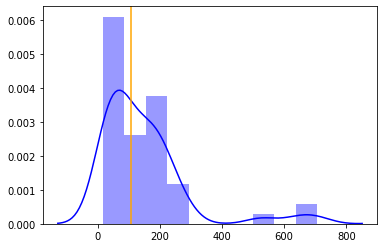

In [ ]:
graph = df['vet_suicides'].values
sns.distplot(graph, color='blue')
median = df['vet_suicides'].median()
plt.axvline(median, 0,1, color='orange')


In [ ]:
df.loc[df['vet_suicides'] > 500, 'vet_suicides'] = df['vet_suicides'].median()


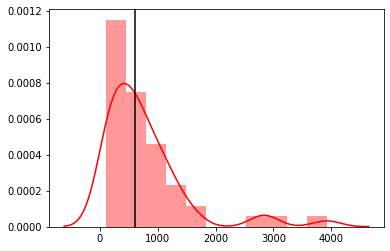

In [ ]:
graph_as =df['all_suicides'].values
sns.distplot(graph_as, color='red')
median_as = df['all_suicides'].median()
plt.axvline(median_as, 0, 1, color='black')

In [ ]:
df.loc[df['all_suicides'] >2500, 'all_suicides'] = df['all_suicides'].median()

In [ ]:
for column in df:
  print(column, ':', df[column].isnull().sum())

Unnamed: 0 : 0
state : 0
vet_pop : 0
overall_pop_18 : 0
vet_pop_p : 0
vet_suicides : 0
all_suicides : 0
vet_suicides_p : 0
vet_males : 0
vet_males_p : 0
vet_females : 0
vet_females_p : 0
vet_rate : 0
civ_rate : 0


In [ ]:
df['vet_males'].fillna(df['vet_males'].median(), inplace=True)

In [ ]:
df['vet_females'].fillna(df['vet_females'].median(), inplace=True)

In [ ]:
del df['vet_15_24']
del df['vet_18_29']
del df['vet_17_34']
del df['vet_25_34']
del df['vet_30_39']
del df['vet_25_44']
del df['vet_35_44']
del df['vet_35-54']
del df['vet_40_49']
del df['vet_45_54']
del df['vet_50_59']
del df['vet_45_64']
del df['vet_55_64']
del df['vet_60']
del df['vet_65']

In [ ]:
def get_state(name):
  return name

In [ ]:
states = set([x for x in df['state'].map(lambda x: get_state(x))])
print(states)

{'Delaware', 'Louisiana', 'Nevada', 'North Dakota**', 'Nebraska', 'Wisconsin', 'Texas', 'Tennessee', 'Vermont', 'Minnesota', 'California', 'Arkansas', 'Missouri***', 'Maryland', 'New Jersey', 'Kansas', 'North Carolina', 'Massachusetts', 'Wyoming', 'Indiana', 'Maine', 'Iowa', 'South Dakota', 'Oregon', 'Alaska', 'Alabama', 'Washington', 'Georgia', 'South Carolina', 'Mississippi', 'New York', 'Illinois', 'Colorado', 'Connecticut', 'Kentucky', 'New Hampshire', 'Montana', 'Oklahoma', 'Florida*', 'Michigan', 'Ohio', 'Utah', 'West Virginia', 'Virginia', 'Rhode Island', 'Pennsylvania', 'Arizona', 'Hawaii', 'New Mexico', 'Idaho'}


In [ ]:
def make_regions(x):
  states = x['state']
  if states in ['California', 'Oregon', 'Washington', 'Idaho', 'Montana', 'Wyoming','Alaska']:
    return 'Northwest'
  elif states in ['Nevada', 'Arizona', 'Hawaii', 'Utah', 'New Mexico', 'Wyoming','Colorado']:
    return 'Southwest'
  elif states in ['Texas', 'Arkansas', 'Oklahoma', 'Louisiana', 'Montana', 'Mississippi']:
    return 'Central'
  elif states in ['Missouri***', 'Kansas', 'Illinois', 'Wisconsin', 'Minnesota', 'North Dakota**','South Dakota','Nebraska', 'Iowa']:
    return 'Midwest'
  elif states in ['Alabama', 'Florida*', 'Georgia', 'Tennessee', 'West Virginia', 'Kentucky','Virginia','North Carolina', 'South Carolina']:
    return 'Southeast'
  elif states in ['Michigan', 'Ohio', 'New Jersey', 'Indiana', 'Pennsylvania', 'Maryland','Connecticut', 'New Hampshire','Vermont','Rhode Island', 'Massachusetts', 'Delaware', 'Maine','New York']:
    return 'Northeast'
  else:
    return states

In [ ]:
df['states'] = df['state'].map(lambda x: get_state(x))

In [ ]:
df ['states'] = df.apply(make_regions, axis=1)

In [ ]:
print(df.states.value_counts())

Northeast    14
Southeast     9
Midwest       9
Northwest     7
Southwest     6
Central       5
Name: states, dtype: int64


In [ ]:
del df['state']

In [ ]:
df.sample(20)

,Unnamed: 0,vet_pop,overall_pop_18,vet_pop_p,vet_suicides,all_suicides,vet_suicides_p,vet_males,vet_males_p,vet_females,vet_females_p,vet_rate,civ_rate,states
15,15,210240,2132796,0.098575,72.0,400,0.180000,70.0,0.972222,2.0,0.027778,34.246575,17.060621,Midwest
49,49,52415,430554,0.121739,30.0,132,0.227273,109.0,0.000000,0.0,0.000000,57.235524,26.974208,Northwest
18,18,128940,1056250,0.122073,30.0,198,0.151515,109.0,0.000000,3.0,0.000000,23.266636,18.116919,Northeast
46,46,597778,5194460,0.115080,207.0,955,0.216754,196.0,0.946860,11.0,0.053140,34.628240,16.272607,Northwest
47,47,155581,1467977,0.105983,70.0,277,0.252708,67.0,0.957143,3.0,0.042857,44.992640,15.772678,Southeast
13,13,458943,4915722,0.093362,164.0,861,0.190476,162.0,0.987805,2.0,0.012195,35.734285,15.639097,Northeast
40,40,70027,618454,0.113229,25.0,123,0.203252,109.0,0.000000,3.0,0.000000,35.700516,17.869288,Midwest
6,6,225987,2768440,0.081630,54.0,364,0.148352,109.0,0.000000,3.0,0.000000,23.895180,12.192949,Northeast
29,29,444887,6771714,0.065698,92.0,668,0.137725,89.0,0.967391,3.0,0.032609,20.679408,9.104090,Northeast
19,19,425963,4457846,0.095554,90.0,504,0.178571,109.0,0.000000,3.0,0.000000,21.128596,10.268155,Northeast


In [ ]:
df['states'].replace(('Northwest','Southwest', 'Central', 'Midwest', 'Southeast', 'Northeast'), (0,1,2,3,4,5), inplace=True)

In [ ]:
corr = df.corr()
corr.vet_suicides.sort_values(ascending=False)

vet_suicides      1.000000
vet_pop           0.540572
all_suicides      0.487285
overall_pop_18    0.456256
vet_males         0.416491
vet_females       0.251847
vet_suicides_p    0.213459
vet_males_p       0.139031
states            0.129268
Unnamed: 0        0.060280
vet_rate         -0.013221
vet_females_p    -0.102727
vet_pop_p        -0.201769
civ_rate         -0.319687
Name: vet_suicides, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

x=df.drop(['vet_pop','Unnamed: 0'], axis=1)
y=df['vet_suicides']
x_tain,x_val,y_train,y_val=train_test_split(x,y, test_size=0.1)

In [ ]:
import pickle